In [5]:
import string
from nltk.corpus import stopwords
import nltk 
import pandas as pd
import numpy as np
import re
from collections import Counter
import csv
from nltk import stem
import difflib
from textblob import TextBlob
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
from nltk.corpus import stopwords

# Dictionary

In [7]:
abb = pd.read_csv("dictionary2_0210.csv")
abb =abb.drop_duplicates()
abb =abb.dropna()
print(abb.head())

FileNotFoundError: [Errno 2] File b'dictionary2_0210.csv' does not exist: b'dictionary2_0210.csv'

In [ ]:
print(len(abb))
print(len(abb['Form'].unique()))

In [4]:
abb['Form'].value_counts().head(5)
#some rows have the same column value

NameError: name 'abb' is not defined

In [163]:
array = ['EST','CAT','AWOS','ATA']
abb.loc[abb['Form'].isin(array)]

,Name,Form
1,Actual Time Of Arrival,ATA
13,Air Traffic Area,ATA
40,Automated Surface Observation Sys (Or Weather ...,AWOS
46,Automatic Weather Observing System,AWOS
65,Category,CAT
79,Clear Air Turbulence,CAT
127,Eastern Standard Time,EST
139,Estimate,EST


In [164]:
#Unify some values
abb.loc[1,'Name'] = 'Actual Time Of Arrival/Air Traffic Area'
abb.loc[13,'Name'] = 'Actual Time Of Arrival/Air Traffic Area'
abb.loc[40,'Name'] = 'Automatic Weather Observing System'
abb.loc[46,'Name'] = 'Automatic Weather Observing System'
abb.loc[65,'Name'] ='Category/Clear Air Turbulence'
abb.loc[79,'Name'] ='Category/Clear Air Turbulence'
abb.loc[127,'Name'] = 'Eastern Standard Time/Estimate'
abb.loc[139,'Name'] = 'Eastern Standard Time/Estimate'

In [165]:
abb =abb.drop_duplicates()
abb =abb.dropna()
abb['Form'].value_counts().head(5)

APPROX     1
MAINT      1
SUPVR      1
autoplt    1
CPU        1
Name: Form, dtype: int64

In [166]:
#Remove rows that contain numeric values
indexNames = abb[(abb['Form'].str.contains('0')) | (abb['Form'].str.contains('1'))|
                 (abb['Form'].str.contains('2')) | (abb['Form'].str.contains('3'))|
                 (abb['Form'].str.contains('4')) | (abb['Form'].str.contains('5'))|
                 (abb['Form'].str.contains('6')) | (abb['Form'].str.contains('7'))|
                 (abb['Form'].str.contains('8')) | (abb['Form'].str.contains('9'))].index
abb.drop(indexNames , inplace=True)

In [167]:
print(len(abb)),print(len(abb['Form'].unique()))
abb.head()

562
562


,Name,Form
0,Above Ground Level,AGL
1,Actual Time Of Arrival/Air Traffic Area,ATA
2,Actual Time Of Departure,ATD
3,Aeronautical,AERO
4,Aeronautical Information Manual,AIM


In [168]:
#Create the dictionary
dict_abb = {}
for i in range(len(abb)):   
    word = ' '+abb.iloc[i,1]+' '
    value = ' '+abb.iloc[i,0]+' '
    dict_abb[word] = value
#Standard 2400' Hi-Intensity Approach Lighting System With Sequenced Flashers (Cat I Config), ALSF-1
#Standard 2400' Hi-Intensity Approach Lighting System With Sequenced Flashers (Cat Ii Config), ALSF-2
dict_abb = {k.lower(): v.lower() for k, v in dict_abb.items()}

# ASRS

In [314]:
df = pd.read_csv('asrs_sample_for_model.csv')
df.columns[-16:-10]

Index(['report 1', 'report 1.1', 'report 2', 'report 2.1', 'report 1.2',
       'unnamed: 96'],
      dtype='object')

In [315]:
re1 = df['report 1']

In [316]:
a = re1.str.findall(r"didn\'t")
print(a.sum())

["didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't", "didn't"]


In [317]:
#decontraction
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"didn\'t", "did not", phrase)
    phrase = re.sub(r"don\'t", "do not", phrase)
    phrase = re.sub(r"o\'clock", "clock", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)
    phrase = re.sub(r"that\'s", "that is", phrase)       
    phrase = re.sub(r"go-around", "go around", phrase)  
    # general
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [318]:
for i in range(len(re1)):
    re1[i] = decontracted(re1[i].lower())
a = re1.str.findall(r"didn\'t")
print(a.sum())

[]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [319]:
def text_process1(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ' '+''.join(nopunc).lower()+' '
    return nopunc

In [320]:
re1 =re1.apply(text_process1)

In [321]:
re1[0]

' i was holding short of runway xx preparing for takeoff i heard aircraft y on downwind then announce his base turn from previous experience i thought i still had ample time to take off and announced an immediate departure and that i should be no factor for the landing traffic as i was on my takeoff roll the landing traffic said i am right on top of you i am going around i apologized and continued my takeoff i suspect he may have turned a tight base and final  but in the future will remember to ask the landing pilot if i have time to take off '

In [322]:
#replace abbreviation with words
for i in range(len(re1)):
    for k, v in dict_abb.items():
        re1[i] = re1[i].replace(k, v)
re1_new = re1.copy()

In [323]:
for i in range(len(re1)):
    for k, v in dict_abb.items():
        re1[i] = re1[i].replace(k, v)

In [324]:
#remove blanks
for i in range(len(re1_new)):
    re1_new[i] = re1_new[i][1:-1]
re1_new[0]

'i was holding short of runway xx preparing for takeoff i heard aircraft y on downwind then announce his base turn from previous experience i thought i still had ample time to take off and announced an immediate departure and that i should be no factor for the landing traffic as i was on my takeoff roll the landing traffic said i ante meridiem right on top of you i ante meridiem going around i apologized and continued my takeoff i suspect he may have turned a tight base and final  but in the future will remember to ask the landing pilot intermediate fix i have time to take off'

In [325]:
result_tem = pd.concat([df.iloc[:,-1], re1_new], axis=1, sort=False)
result_tem.columns =['airspace_abre_2_2', 'new report 1']
result = pd.concat([df.iloc[:, :-1], result_tem], axis=1, sort=False)
result.to_csv('sample_re1.csv')

# Sentiment Analysis

In [327]:
result['polarity'] = result['new report 1'].map(lambda text: TextBlob(text).sentiment.polarity)

In [368]:
result.columns[80:110]

Index(['events.1', 'passenger_involved', 'detector', 'deteced_phase',
       'atc_steps', 'assessments', 'assessments.1', 'report 1', 'report 1.1',
       'report 2', 'report 2.1', 'report 1.2', 'unnamed: 96', 'year', 'month',
       'airspace_class_1_1', 'airspace_abre_1_1', 'airspace_class_1_2',
       'airspace_abre_1_2', 'airspace_class_2_1', 'airspace_abre_2_1',
       'airspace_class_2_2', 'airspace_abre_2_2', 'new report 1', 'polarity'],
      dtype='object')

In [362]:
#dangerous proportion: polarity < -0.1

class_list =result['airspace_class_1_1'].unique()
danger = pd.DataFrame(columns = ['airspace', 'danger_proportion_0','danger_proportion_-0.01','danger proportion_-0.1'])

for i in range(len(class_list)):
    airspace =result['airspace_class_1_1']==class_list[i]
    if len(result[airspace]['polarity'])==0:
        danger = danger
    else:
        danger = danger.append({'airspace': class_list[i],
                                              'danger_proportion_0': round(sum(result[airspace]['polarity']<0)/len(result[airspace]['polarity']),2),
                                              'danger_proportion_-0.01': round(sum(result[airspace]['polarity']<-0.01)/len(result[airspace]['polarity']),2),
                                              'danger proportion_-0.1': round(sum(result[airspace]['polarity']<-0.1)/len(result[airspace]['polarity']),2)}, ignore_index=True)
danger.sort_values(by=['danger_proportion_-0.01'],ascending=False)

,airspace,danger_proportion_0,danger_proportion_-0.01,danger proportion_-0.1
1,G,0.61,0.56,0.18
5,A,0.44,0.39,0.10
2,B,0.42,0.38,0.10
3,D,0.38,0.36,0.08
4,C,0.38,0.34,0.06
0,E,0.33,0.29,0.06


In [361]:
#dangerous proportion: polarity < -0.1

class_list =result['assessments.1'].unique()
danger = pd.DataFrame(columns = ['assessments.1', 'danger_proportion_0','danger_proportion_-0.01','danger_proportion_-0.1'])

for i in range(len(class_list)):
    class_ =result['assessments.1']==class_list[i]
    if len(result[class_]['polarity'])==0:
           danger = danger
    else:
           danger = danger.append({'assessments.1': class_list[i],
                                   'danger_proportion_0': round(sum(result[class_]['polarity']<0)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.01': round(sum(result[class_]['polarity']<-0.01)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.1': round(sum(result[class_]['polarity']<-0.1)/len(result[class_]['polarity']),2),
                                          }, ignore_index=True)
danger.sort_values(by=['danger_proportion_-0.01'],ascending=False)

,assessments.1,danger_proportion_0,danger_proportion_-0.01,danger_proportion_-0.1
11,Equipment / Tooling,1.00,1.00,0.00
9,Manuals,0.67,0.67,0.00
0,Human Factors,0.47,0.42,0.10
6,Weather,0.42,0.42,0.05
2,Procedure,0.41,0.34,0.00
5,Environment - Non Weather Related,0.33,0.33,0.11
8,Chart Or Publication,0.42,0.33,0.08
10,ATC Equipment / Nav Facility / Buildings,0.31,0.31,0.08
12,Company Policy,0.43,0.29,0.00
1,Ambiguous,0.32,0.28,0.07


In [365]:
#dangerous proportion: polarity < -0.1

class_list =result['airspace_abre_1_1'].unique()
danger = pd.DataFrame(columns = ['airspace_abre_1_1', 'danger_proportion_0','danger_proportion_-0.01','danger_proportion_-0.1'])

for i in range(len(class_list)):
    class_ =result['airspace_abre_1_1']==class_list[i]
    if len(result[class_]['polarity'])==0:
           danger = danger
    else:
           danger = danger.append({'airspace_abre_1_1': class_list[i],
                                   'danger_proportion_0': round(sum(result[class_]['polarity']<0)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.01': round(sum(result[class_]['polarity']<-0.01)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.1': round(sum(result[class_]['polarity']<-0.1)/len(result[class_]['polarity']),2),
                                          }, ignore_index=True)
danger.sort_values(by=['danger_proportion_-0.01'],ascending=False).head(10)

,airspace_abre_1_1,danger_proportion_0,danger_proportion_-0.01,danger_proportion_-0.1
130,LOU,1.0,1.0,0.0
108,MCO,1.0,1.0,0.0
140,BTL,1.0,1.0,0.0
172,STP,1.0,1.0,0.0
174,ISM,1.0,1.0,0.0
177,MEM,1.0,1.0,1.0
69,FLL,1.0,1.0,0.0
180,MMV,1.0,1.0,1.0
66,MGM,1.0,1.0,1.0
182,SRQ,1.0,1.0,0.0


In [375]:
#dangerous proportion: polarity < -0.1

class_list =result['year'].unique()
danger = pd.DataFrame(columns = ['year', 'danger_proportion_0','danger_proportion_-0.01','danger_proportion_-0.1'])

for i in range(len(class_list)):
    class_ =result['year']==class_list[i]
    if len(result[class_]['polarity'])==0:
           danger = danger
    else:
           danger = danger.append({'year': class_list[i],
                                   'danger_proportion_0': round(sum(result[class_]['polarity']<0)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.01': round(sum(result[class_]['polarity']<-0.01)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.1': round(sum(result[class_]['polarity']<-0.1)/len(result[class_]['polarity']),2),
                                          }, ignore_index=True)
danger = danger.sort_values(by=['year'],ascending=False).head(10)

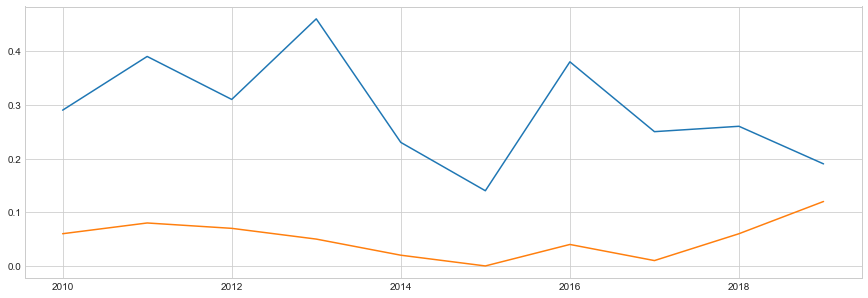

In [380]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (15,5))
plt.plot(danger['year'], danger['danger_proportion_-0.01'])
plt.plot(danger['year'], danger['danger_proportion_-0.1'])

In [382]:
#dangerous proportion: polarity < -0.1

class_list =result['month'].unique()
danger = pd.DataFrame(columns = ['month', 'danger_proportion_0','danger_proportion_-0.01','danger_proportion_-0.1'])

for i in range(len(class_list)):
    class_ =result['month']==class_list[i]
    if len(result[class_]['polarity'])==0:
           danger = danger
    else:
           danger = danger.append({'month': class_list[i],
                                   'danger_proportion_0': round(sum(result[class_]['polarity']<0)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.01': round(sum(result[class_]['polarity']<-0.01)/len(result[class_]['polarity']),2),
                                   'danger_proportion_-0.1': round(sum(result[class_]['polarity']<-0.1)/len(result[class_]['polarity']),2),
                                          }, ignore_index=True)
danger = danger.sort_values(by=['month'],ascending=False).head(10)

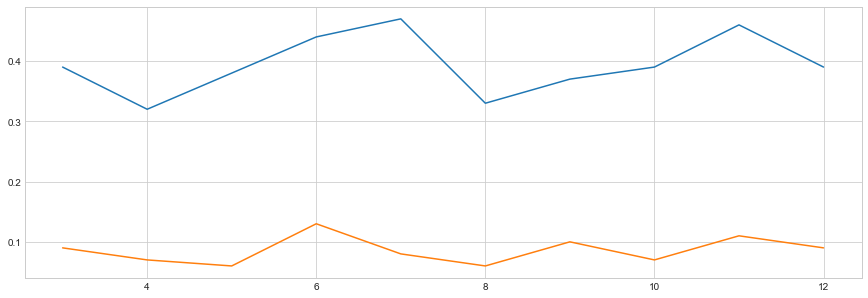

In [384]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = (15,5))
plt.plot(danger['month'], danger['danger_proportion_0'])
plt.plot(danger['month'], danger['danger_proportion_-0.1'])

In [235]:
#result['polarity']==-0.375000
result['new report 1'][9]

'i contacted tower with i prefer runways 25 response was enter l base runways 25 cleared to land i confused said are base runways 25 cleared to land expecting to be corrected intermediate fix wrong i landed runways 7 not realizing when i departed 45 mins later i realized what i had done and figured tower let it slide i was in a hurry and tired next time i will ask to clarify and remember to mentally and with horizontal situation indicator compare what i ask for with what i get i could also have the plan missed approach point of the airport out'

In [247]:
#result['polarity']==-0.300000
result['new report 1'][57]

'i was on a recurrent training flight with an instructor we had done 2 hrs of practice approaches emergency landings etc and were about to land at our base of operations on downwind my instructor asked me to do a noflaps landing i pull the power back but had trouble slowing the plane to vlo even with speed brakes we both recalled 3 green but when we landed had no gear'

In [249]:
#result['polarity']==0.281250
result['new report 1'][69]

'when leaving the lincoln lkn airport i was advised by the ground controller to taxi to takeoff runways which i did stopping at the hold line while i was switching to tower frequency the plane rolled forward till the front 12 of the plane was over the hold line before i noticed and stopped the movement the tower then gave me permission to take off which i did and followed their instructions while leaving the airspace no other planes were landing or taking off at the time i plan to get more hrs at a tower controled airport with an instructor'

# Word Count

In [181]:
#Combine all lists to one list
re1_word=[]
for i in range(len(re1_new)):
    re1_new[i] = re1_new[i].split(' ')
    re1_word = re1_word +re1_new[i]

In [182]:
nltk.download('wordnet')
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [183]:
def word_count(x):
    #Remove stop words from the list
    stop_words = stopwords.words('english')
    x =[word for word in x if word not in stop_words]
    #Stemming
    #re1_word = [stem(word) for word in re1_word]
    x = [wnl.lemmatize(word) for word in x]
    #remove words contain number
    x = [word for word in x if all(digit not in word for digit in "1234567890")]
    #remove blank
    return [word for word in x if word != '']

In [184]:
re1_word_remove = word_count(re1_word)

In [185]:
#word count
counts = Counter(re1_word_remove)
frequency =[(l,k) for k,l in sorted([(j,i) for i,j in counts.items()], reverse=True)]
frequency = pd.DataFrame(frequency)
frequency.columns = ['Word','Count']

In [186]:
#add frequency column
frequency['Percentage'] = round(100 * frequency['Count'] / frequency['Count'].sum(),2)

In [187]:
frequency[0:10]

,Word,Count,Percentage
0,runway,474,1.85
1,aircraft,455,1.78
2,flight,363,1.42
3,foot,300,1.17
4,traffic,293,1.15
5,tower,247,0.97
6,approach,221,0.86
7,u,191,0.75
8,control,183,0.72
9,controller,180,0.70


In [188]:
frequency.to_csv('sample_re1_word_count.csv')

# Extracing Regular Words

In [189]:
# import two dictionaries to remove regular words
dict_regular = pd.read_csv("dictionary2_0210.csv")
dict_engmix_df = pd.read_csv("engmix.csv", encoding='latin1')

In [190]:
dict_engmix = list(dict_engmix_df.iloc[:, 0])
len(dict_engmix)

84118

In [191]:
# store the first column with words 
dict_words = dict_regular.iloc[:, 0]
len(dict_words)

570

In [192]:
# remove duplicated words and make them lowercase
dict_words = list(dict.fromkeys(dict_words))
dict_words = [x.lower() for x in dict_words]
len(dict_words)

564

In [193]:
# remove function
def remove_words(original_dict, dict_):
    filter_bool = []
    for word in original_dict["Word"]:
        filter_bool.append(word not in dict_)
        
    new_dict = original_dict[filter_bool]
    return new_dict

In [194]:
# use the dict_words to remove
dict_temp = remove_words(frequency, dict_words)

In [195]:
# use the dict_engmix to remove
dict_abnormal = remove_words(dict_temp, dict_engmix)
len(dict_abnormal)

501

In [196]:
dict_abnormal.head(20)

,Word,Count,Percentage
194,teb,26,0.10
238,zzz,21,0.08
274,kt,19,0.07
284,tcas,18,0.07
371,pdk,14,0.05
374,hr,14,0.05
458,mry,11,0.04
477,zoa,10,0.04
519,atl,10,0.04
524,wentz,9,0.04


In [197]:
#proportion of remaining abbs 
sum(dict_abnormal['Percentage'])

2.659999999999987

In [198]:
dict_abnormal.to_csv("sample_re1_remaining_abbs.csv")